# This file is for collectively plotting results for the final work

In [8]:
import pandas as pd
import numpy as np
import glob
from copy import deepcopy


Read the output from the experiments collectively. First, imports the file names with glob:

In [9]:
#file_pattern = "W://DS//Optimization//Term project//output//objective function values//*" # file name patterns
file_pattern = "E:\Work\DS\Optimization\Term Project\git//output//objective function values//*" # file name patterns
csv_files = sorted(glob.glob(file_pattern))

Now read over files.

In [10]:
# Iterate through the CSV files
current_data_set = None
data = {}

for csv_file in csv_files:
    # Extract the data set identifier from the file name
    data_set_identifier, part = '_'.join(csv_file.split('_')[:-1]).split('\\')[-1] , csv_file.split('_')[-1].split('.')[0]

    # Check if we have moved to a new data set
    if data_set_identifier != current_data_set:
        # Process the current dataset
        print(f"Importing parts for data set: {data_set_identifier}")
        
        # first stored the read data
        if current_data_set != None:
            data[current_data_set] =  deepcopy(df.values)
    
        # Reset for the new data set
        current_data_set = data_set_identifier
        df = pd.read_csv(csv_file, header = None)
        df['part'] = int(part)
    
    else:
        df_to_concatenate = pd.read_csv(csv_file, header = None)
        df_to_concatenate['part'] = int(part)
        df = pd.concat([df,df_to_concatenate])

# save the last dataframe
data[current_data_set] =  deepcopy(df.values)      

Importing parts for data set: objective_function_values_max_distance_10000metres
Importing parts for data set: objective_function_values_max_distance_20000metres
Importing parts for data set: objective_function_values_max_distance_30000metres
Importing parts for data set: objective_function_values_max_distance_no limit
Importing parts for data set: objective_function_values_max_duration_0900seconds
Importing parts for data set: objective_function_values_max_duration_1800seconds
Importing parts for data set: objective_function_values_max_duration_3600seconds
Importing parts for data set: objective_function_values_max_duration_5400seconds
Importing parts for data set: objective_function_values_max_duration_7200seconds
Importing parts for data set: objective_function_values_max_duration_no limit


### Demonstrate that different parts contains different non-dominated points due to probability.

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['axes.axisbelow'] = True

In [12]:
data['objective_function_values_max_duration_7200seconds']

array([[ 8.        ,  4.8125    ,  1.        ],
       [ 8.        ,  4.8125    ,  1.        ],
       [ 3.        ,  4.9       ,  1.        ],
       ...,
       [18.        ,  4.71111111,  6.        ],
       [18.        ,  4.71111111,  6.        ],
       [19.        ,  4.70526316,  6.        ]])

Use the 7200 seconds max travel duration as an example. First map the part numbers to their respective nunmber of genes in individuals.

In [13]:
part_dict = {'1': '8 genes',
             '2': '16 genes',
             '3': '24 genes',
             '4': '32 genes',
             '5': '40 genes',
             '6': '48 genes',}

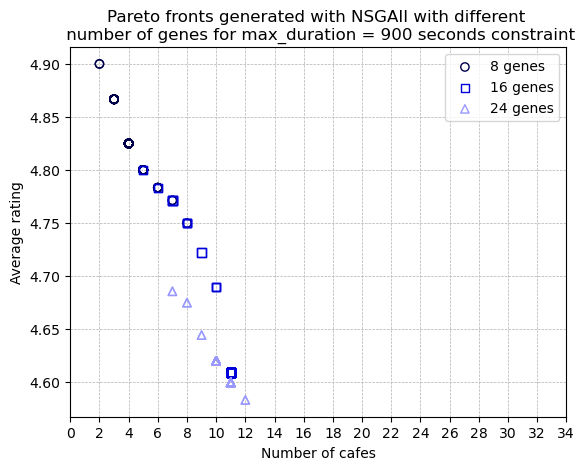

In [14]:
unique_values = np.unique(data['objective_function_values_max_duration_0900seconds'][:,2])
markers = ['o', 's', '^', '.', 'v', 'p']
edgecolors = plt.colormaps['seismic'](np.linspace(0, 1, 6))  # Use colormap for edgecolors
# Create a scatter plot with different markers for each value
for i in unique_values:
    data_to_plot = data['objective_function_values_max_duration_0900seconds'][data['objective_function_values_max_duration_0900seconds'][:,2]==i][:,0:2]
    plt.scatter(data_to_plot[:,0], data_to_plot[:,1], marker=markers[int(i-1)], alpha = 1, label = part_dict[str(int(i))],edgecolors=edgecolors[int(i-1)], facecolors='none')
plt.legend()

# Customize the plot
plt.title('Pareto fronts generated with NSGAII with different \n number of genes for max_duration = 900 seconds constraint')
plt.xlabel('Number of cafes')
plt.ylabel('Average rating')
plt.xticks(range(0, 35,2))
plt.grid(linestyle = '--', linewidth = 0.5)

# Save the plot
plt.savefig("output//final//pareto_fronts_for_different_gene_numbers_900sec.pdf")

# Show the plot
plt.show()

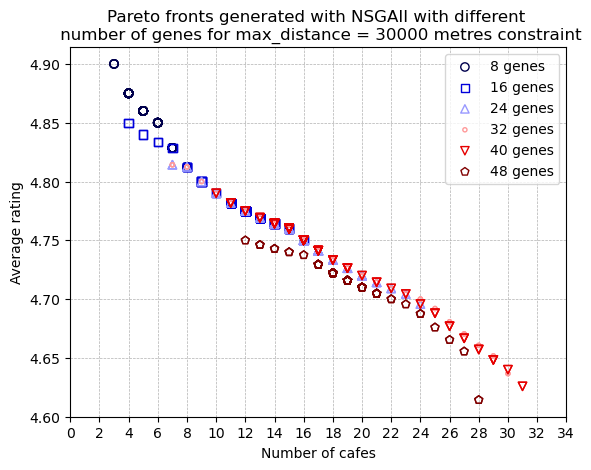

In [22]:
unique_values = np.unique(data['objective_function_values_max_distance_30000metres'][:,2])
markers = ['o', 's', '^', '.', 'v', 'p']
edgecolors = plt.colormaps['seismic'](np.linspace(0, 1, 6))  # Use colormap for edgecolors
# Create a scatter plot with different markers for each value
for i in unique_values:
    data_to_plot = data['objective_function_values_max_distance_30000metres'][data['objective_function_values_max_distance_30000metres'][:,2]==i][:,0:2]
    plt.scatter(data_to_plot[:,0], data_to_plot[:,1], marker=markers[int(i-1)], alpha = 1, label = part_dict[str(int(i))],edgecolors=edgecolors[int(i-1)], facecolors='none')
plt.legend()

# Customize the plot
plt.title('Pareto fronts generated with NSGAII with different \n number of genes for max_distance = 30000 metres constraint')
plt.xlabel('Number of cafes')
plt.ylabel('Average rating')
plt.xticks(range(0, 35,2))
plt.grid(linestyle = '--', linewidth = 0.5)

# Save the plot
plt.savefig("output//final//pareto_fronts_for_different_gene_numbers_30000metres.pdf")

# Show the plot
plt.show()

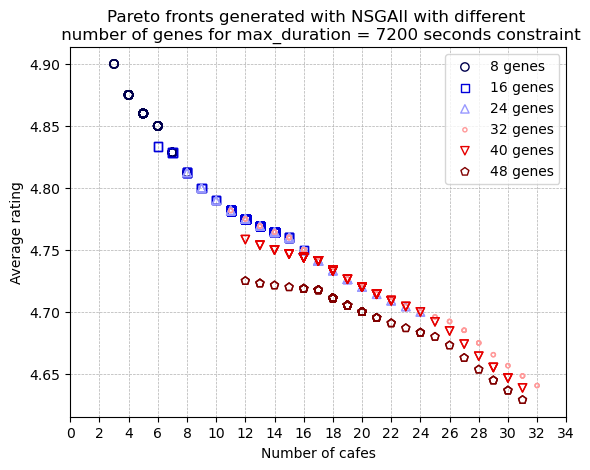

In [15]:
unique_values = np.unique(data['objective_function_values_max_duration_7200seconds'][:,2])
markers = ['o', 's', '^', '.', 'v', 'p']
edgecolors = plt.colormaps['seismic'](np.linspace(0, 1, 6))  # Use colormap for edgecolors
# Create a scatter plot with different markers for each value
for i in unique_values:
    data_to_plot = data['objective_function_values_max_duration_7200seconds'][data['objective_function_values_max_duration_7200seconds'][:,2]==i][:,0:2]
    plt.scatter(data_to_plot[:,0], data_to_plot[:,1], marker=markers[int(i-1)], alpha = 1, label = part_dict[str(int(i))],edgecolors=edgecolors[int(i-1)], facecolors='none')
plt.legend()

# Customize the plot
plt.title('Pareto fronts generated with NSGAII with different \n number of genes for max_duration = 7200 seconds constraint')
plt.xlabel('Number of cafes')
plt.ylabel('Average rating')
plt.xticks(range(0, 35,2))
plt.grid(linestyle = '--', linewidth = 0.5)

# Save the plot
plt.savefig("output//final//pareto_fronts_for_different_gene_numbers.pdf")

# Show the plot
plt.show()


### Find actual non-dominated points

Different data were run with different number of genes in an individual to increase the probability of the solution to land in less probable cases.

In [16]:
from scipy.spatial.distance import cdist

def dominates(a, b):
    return (np.asarray(a) >= b).all() and (np.asarray(a)  > b).any()

def get_ruler(a):
    a = np.unique(a, axis =0)
    X = ~cdist(a, a, metric=dominates).astype(bool).any(axis = 0)
    return a[X]

Run the ger_ruler over the data:

In [17]:
data_non_dominated = {key: get_ruler(value[:,0:2]) for key, value in data.items()}

Plot the new pareto front over the old results for 7200 seconds constraint.

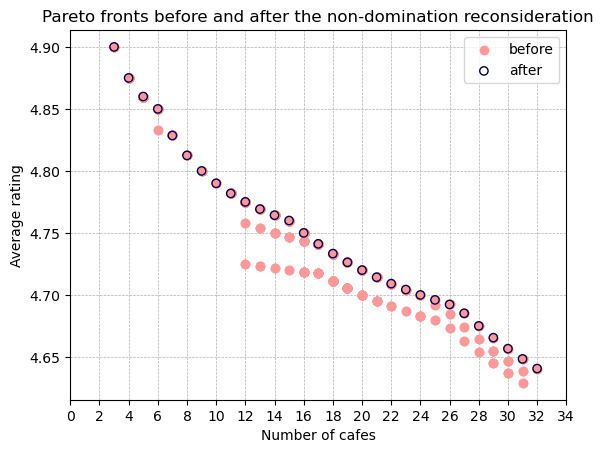

In [18]:
data_to_plot_before = data['objective_function_values_max_duration_7200seconds'][:,0:2]
data_to_plot_after = data_non_dominated['objective_function_values_max_duration_7200seconds'][:,0:2]

edgecolors = plt.colormaps['seismic'](np.linspace(0, 1, 6))  # Use colormap for edgecolors

plt.scatter(data_to_plot_before[:,0],data_to_plot_before[:,1], label = 'before', facecolors=edgecolors[3])
plt.scatter(data_to_plot_after[:,0], data_to_plot_after[:,1], label = 'after', edgecolors=edgecolors[0], facecolors = 'none')
plt.legend()

# Customize the plot
plt.title('Pareto fronts before and after the non-domination reconsideration')
plt.xlabel('Number of cafes')
plt.ylabel('Average rating')
plt.xticks(range(0, 35,2))
plt.grid(linestyle = '--', linewidth = 0.5)

# Save the plot
plt.savefig("output//final//pareto_fronts_non_dominated.pdf")

# Show the plot
plt.show()

### Plot pareto fronts for max distance constraints.

In [19]:
# add space after the number
def add_space_before_letters(input_str):
    result = ''
    if input_str != 'no limit':
    # exclude the first special case
        for char in input_str:
            if char.isalpha() and result and result[-1].isdigit():
                result += ' '
            result += char
        
        if result != '0900 seconds':
        # exclude the second special case
            return result
        else:
            return '900 seconds'

    else:
        return input_str

Currently plotting:max distance 10000 metres
Currently plotting:max distance 20000 metres
Currently plotting:max distance 30000 metres
Currently plotting:max distance no limit
Currently plotting:max duration 900 seconds


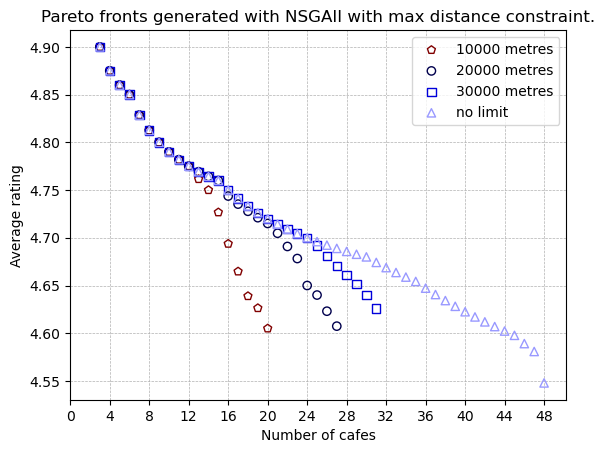

Currently plotting:max duration 1800 seconds
Currently plotting:max duration 3600 seconds
Currently plotting:max duration 5400 seconds
Currently plotting:max duration 7200 seconds
Currently plotting:max duration no limit


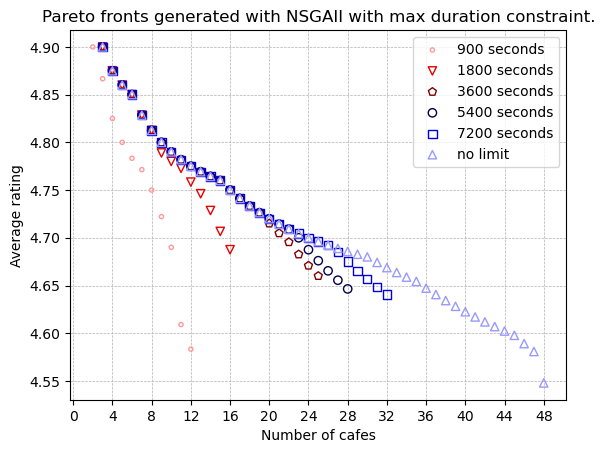

In [20]:
current_constraint_type = None

for i,(key, value) in enumerate(data_non_dominated.items()):
    constraint_type, constraint = ' '.join(key.split('_')[3:-1]), key.split('_')[-1]
    print('Currently plotting:'+constraint_type +' '+ add_space_before_letters(constraint))

    # check if current constraint type matches
    if constraint_type != current_constraint_type:

        # plot the graph and save if current constraint type is not None
        if current_constraint_type != None:
            # Customize the plot
            plt.title('Pareto fronts generated with NSGAII with '+current_constraint_type+' constraint.')
            plt.xticks(range(0, 49,4))
            plt.grid(linestyle = '--', linewidth = 0.5)
            plt.xlabel('Number of cafes')
            plt.ylabel('Average rating')
            plt.legend()
            
            # save figure
            plt.savefig("output//final//pareto_fronts_"+current_constraint_type.replace(' ', '_')+".pdf")

            # show plot
            plt.show()

        # reset constraint type
        current_constraint_type = constraint_type

        # plot the first data
        plt.scatter(data_non_dominated[key][:,0], data_non_dominated[key][:,1], label = add_space_before_letters(constraint),marker=markers[(i-1)%6], edgecolors=edgecolors[(i-1)%6], facecolors='none')

    elif constraint:
    # continue plotting in the same figure
        plt.scatter(data_non_dominated[key][:,0], data_non_dominated[key][:,1], label = add_space_before_letters(constraint),marker=markers[(i-1)%6], edgecolors=edgecolors[(i-1)%6], facecolors='none')

# plot the last scatter plot #
# Customize the plot
plt.title('Pareto fronts generated with NSGAII with '+current_constraint_type+' constraint.')
plt.xticks(range(0, 49,4))
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel('Number of cafes')
plt.ylabel('Average rating')
plt.legend()
            
# save figure
plt.savefig("output//final//pareto_fronts_"+current_constraint_type.replace(' ', '_')+".pdf")

# show plot
plt.show()

